# Handwritten Digits Recognition using MLP from scratch




![title](MLP.png)

In [1]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#import tensorflow for loading the dataset MNIST
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# load the Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape and normalize the data
train_images = train_images.reshape((train_images.shape[0],train_images.shape[1]*train_images.shape[2])).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0],test_images.shape[1]*test_images.shape[2])).astype('float32') / 255

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Transpose data to match the shapes
X_train = train_images.T
Y_train = train_labels.T
X_test = test_images.T
Y_test = test_labels.T

In [3]:
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (784, 60000)
shape of Y_train : (10, 60000)
shape of X_test : (784, 10000)
shape of Y_test : (10, 10000)


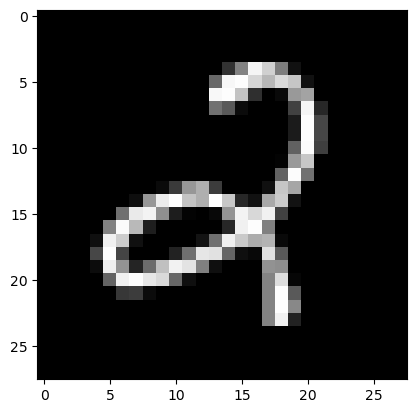

In [4]:
# Randomly select an image from the train_set
index = random.randrange(0, X_train.shape[1])
# Display the selected image
plt.imshow(X_train[:, index].reshape(28, 28), cmap = 'gray')
plt.show()

# Activation functions

![title](activationfun.png)

In [5]:
#activation functions
def relu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expX = np.exp(Z)
    return expX/np.sum(expX, axis = 0)

In [6]:
#derivative of activation function Relu
def derivative_relu(Z):
    return (Z > 0).astype('float32')

# initialize_parameters

In [7]:
def initialize_parameters(input_size, layers, output):
    np.random.seed(0)
    #hidden layer 1
    W1 = np.random.randn(layers[0], input_size)* np.sqrt(2 / input_size)
    B1 = np.zeros((layers[0], 1))
    #hidden layer 2
    W2 = np.random.randn(layers[1], layers[0])* np.sqrt(2 / layers[0])
    B2 = np.zeros((layers[1], 1))
    #output layer 
    W3 = np.random.randn(output, layers[1])* np.sqrt(2 / layers[1])
    B3 = np.zeros((output, 1))
    
    parameters = {
        "W1": W1,
        "B1": B1,
        "W2": W2,
        "B2": B2,
        "W3": W3,
        "B3": B3
    }
    
    return parameters

# Forward propagation

![title](forwardprop.png)

In [8]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    B1 = parameters['B1']
    W2 = parameters['W2']
    B2 = parameters['B2']
    W3 = parameters['W3']
    B3 = parameters['B3']
    
    Z1 = np.dot(W1, X) + B1
    A1 = relu(Z1)
    
    Z2 = np.dot(W2, A1) + B2
    A2 = relu(Z2)
    
    Z3 = np.dot(W3, A2) + B3
    A3 = softmax(Z3)
    
    forward_cache = {
        
        "A1": A1,       
        "A2": A2,        
        "A3": A3
    }
    
    return forward_cache


# Loss function

In [9]:
def compute_loss(A3, Y):
    
    m = Y.shape[1]
    L = -np.sum(Y * np.log(A3)) / m  
    return L

# Backward propagation

![title](Backprop.png)

In [10]:
def backward_propagation(X, Y, parameters, forward_cache):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    A1 = forward_cache['A1']
    A2 = forward_cache['A2']
    A3 = forward_cache['A3']
    
    # Backward pass through the output layer with softmax and loss
    dZ3 = A3 - Y
    dW3 = np.dot(dZ3, A2.T) / m
    dB3 = np.sum(dZ3, axis=1, keepdims=True) / m
    
    # Backward pass through the second hidden layer with ReLU activation
    dZ2 = np.dot(W3.T, dZ3) * derivative_relu(A2)
    dW2 = np.dot(dZ2, A1.T) / m
    dB2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    # Backward pass through the first hidden layer with ReLU activation
    dZ1 = np.dot(W2.T, dZ2) * derivative_relu(A1)
    dW1 = np.dot(dZ1, X.T) / m
    dB1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {
        
        "dW1": dW1,
        "dB1": dB1,
        "dW2": dW2,
        "dB2": dB2,
        "dW3": dW3,
        "dB3": dB3
    }
    return gradients


# Update Parameters

In [11]:
def update_parameters(parameters, gradients, learning_rate):
    
    W1 = parameters['W1']
    B1 = parameters['B1']
    W2 = parameters['W2']
    B2 = parameters['B2']
    W3 = parameters['W3']
    B3 = parameters['B3']
    
    dW1 = gradients['dW1']
    dB1 = gradients['dB1']
    dW2 = gradients['dW2']
    dB2 = gradients['dB2']
    dW3 = gradients['dW3']
    dB3 = gradients['dB3']
    
    W1 = W1 - learning_rate * dW1
    B1 = B1 - learning_rate * dB1
    W2 = W2 - learning_rate * dW2
    B2 = B2 - learning_rate * dB2
    W3 = W3 - learning_rate * dW3
    B3 = B3 - learning_rate * dB3
    
    parameters = {
        "W1": W1,
        "B1": B1,
        "W2": W2,
        "B2": B2,
        "W3": W3,
        "B3": B3
    }
    
    return parameters


# Complete Model

In [12]:
def model(X, Y, layers, learning_rate, iterations):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    parameters = initialize_parameters(n_x, layers, n_y)
    cost_list = []

    for i in range(iterations):
        
        forward_cache = forward_propagation(X, parameters)
        cost = compute_loss(forward_cache['A3'], Y)
        gradients = backward_propagation(X, Y, parameters, forward_cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        cost_list.append(cost)
        
        if i % 10 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters, cost_list

# Train the model

In [13]:
layers = []
layer1_units = int(input("Entrez le nombre d'unités pour la première couche : "))
layers.append(layer1_units)

layer2_units = int(input("Entrez le nombre d'unités pour la deuxième couche cachée : "))
layers.append(layer2_units)

learning_rate = 0.1
iterations = 100

parameters, cost_list = model(X_train, Y_train,layers, learning_rate, iterations)


Entrez le nombre d'unités pour la première couche : 128
Entrez le nombre d'unités pour la deuxième couche cachée : 64
Cost after iteration 0: 2.3141318041211236
Cost after iteration 10: 1.4843995947705388
Cost after iteration 20: 0.9492420579750397
Cost after iteration 30: 0.701896274600664
Cost after iteration 40: 0.5802769916987591
Cost after iteration 50: 0.5107472780870683
Cost after iteration 60: 0.46598815363662893
Cost after iteration 70: 0.43456980383943405
Cost after iteration 80: 0.4111332720444282
Cost after iteration 90: 0.3928138064668625


In [14]:
#parametres of our model
print(parameters)

{'W1': array([[ 0.0890981 ,  0.02021099,  0.04943373, ...,  0.02632982,
         0.03090699, -0.06775582],
       [ 0.02408701,  0.00749784,  0.02672082, ...,  0.00484894,
        -0.00227857,  0.00399625],
       [ 0.04295829, -0.04238217, -0.05110231, ..., -0.00364861,
         0.01571416, -0.05446546],
       ...,
       [ 0.10463745, -0.01817306,  0.0719828 , ...,  0.03185672,
         0.03377056, -0.04224196],
       [-0.02920855, -0.03438521, -0.00519266, ..., -0.04142045,
        -0.01817241,  0.00600112],
       [-0.04080482, -0.03145434, -0.10712083, ..., -0.0230285 ,
         0.0527317 ,  0.06451818]]), 'B1': array([[-0.00279018],
       [ 0.02321333],
       [ 0.03307365],
       [ 0.00818517],
       [ 0.00408012],
       [ 0.04640228],
       [ 0.04765052],
       [ 0.00845607],
       [ 0.0213668 ],
       [ 0.00257737],
       [ 0.01146175],
       [-0.00266692],
       [ 0.04175604],
       [ 0.0328439 ],
       [ 0.00991636],
       [ 0.02161973],
       [-0.00312994],

# Accuracy

In [15]:
def accuracy(inp, labels, parameters):
    
    a_out = forward_propagation(inp, parameters)  
    a_out = np.argmax(a_out['A3'], axis=0)
    labels = np.argmax(labels, axis=0)

    acc = np.mean(a_out == labels) * 100
    return acc

In [16]:
# accuracy for trainSet
train_accuracy = accuracy(X_train, Y_train, parameters)
# accuracy for testSet
test_accuracy = accuracy(X_test, Y_test, parameters)

print("Accuracy pour les données de train :", train_accuracy, "%")
print("Accuracy pour les données de test:", test_accuracy, "%")


Accuracy pour les données de train : 89.55166666666666 %
Accuracy pour les données de test: 90.07 %


# Make a prediction

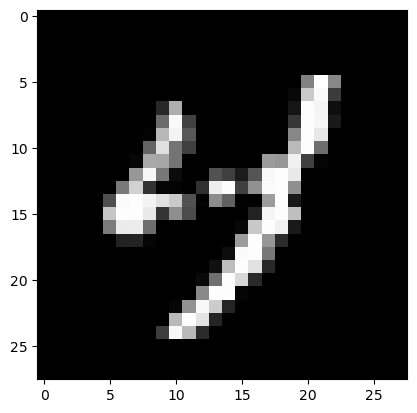

 Notre modèle prédit que c'est: 4


In [17]:
# Randomly select an image from the test set
idx = random.randrange(0, X_test.shape[1])
selected_image = X_test[:, idx].reshape(X_test[:, idx].shape[0], 1)

# Display the selected image
plt.imshow(selected_image.reshape((28, 28)), cmap='gray')
plt.show()

# Calculate and display the model's prediction for the selected image
a_out = forward_propagation(selected_image, parameters)  
predicted_label = np.argmax(a_out['A3'], axis=0)

print(" Notre modèle prédit que c'est:", predicted_label[0])